<a href="https://colab.research.google.com/github/krishnakumari200424/PORTFOLIO-/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)
Train labels shape: (50000, 1)
Sample train labels: [[6]
 [9]
 [9]
 [4]
 [1]]
Reshaped train labels: [6 9 9 4 1]


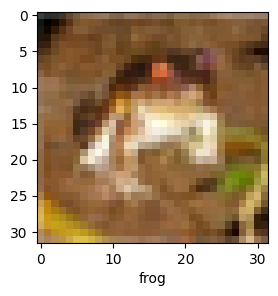

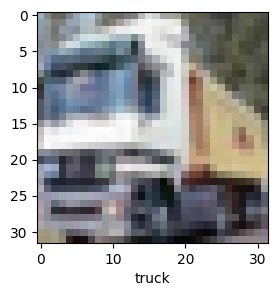

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training ANN model...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.3046 - loss: 1.9315
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 77ms/step - accuracy: 0.4203 - loss: 1.6507
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.4555 - loss: 1.5508
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 79ms/step - accuracy: 0.4768 - loss: 1.4894
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 80ms/step - accuracy: 0.4952 - loss: 1.4287
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step

ANN Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.37      0.47      1000
           1       0.55      0.69      0.61      1000
           2       0.40      0.25      0.30      1000
           3       0.39      0.33      0.35      1000
           4       0.39      0.51      0.44      1000
           5       0.46      0.30      0.36      1000
           6       0.51      0.56      0.54      1000
           7       0.61 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
 470/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.2830 - loss: 1.9395

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Train labels shape:", y_train.shape)
print("Sample train labels:", y_train[:5])

# Reshape labels from 2D to 1D for sparse categorical loss
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print("Reshaped train labels:", y_train[:5])

classes = ["airplane","automobile","bird","cat","deer",
           "dog","frog","horse","ship","truck"]

# Function to plot a sample image with label
def plot_sample(X, y, index):
    plt.figure(figsize=(3,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

# Plot a couple of sample images
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)

# Normalize pixel values to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build a simple Artificial Neural Network (ANN)
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

print("\nTraining ANN model...")
ann.fit(X_train, y_train, epochs=5)

# Evaluate ANN
y_pred_ann = ann.predict(X_test)
y_pred_classes_ann = [np.argmax(element) for element in y_pred_ann]

print("\nANN Classification Report:")
print(classification_report(y_test, y_pred_classes_ann))

# Build a Convolutional Neural Network (CNN)
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

print("\nTraining CNN model...")
cnn.fit(X_train, y_train, epochs=10)

# Evaluate CNN
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"\nCNN Test accuracy: {test_acc:.4f}")

y_pred_cnn = cnn.predict(X_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

print("\nCNN Classification Report:")
print(classification_report(y_test, y_pred_classes_cnn))

# Plot a test sample with predicted and actual labels
def plot_sample_prediction(X, y_true, y_pred, index):
    plt.figure(figsize=(3,3))
    plt.imshow(X[index])
    plt.xlabel(f"True: {classes[y_true[index]]}\nPred: {classes[y_pred[index]]}")
    plt.show()

plot_sample_prediction(X_test, y_test, y_pred_classes_cnn, 3)
